<a href="https://colab.research.google.com/github/josoga2/docs/blob/master/cifar10Crush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import datasets, layers, models

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [0]:
train_images, test_images = train_images/255.0, test_images/255.0

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation='softmax'))


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)             

In [12]:
model.compile(optimizer='SGD',  loss='sparse_categorical_crossentropy', metrics=['mse','accuracy'])

Trainer = model.fit(x=train_images, y=train_labels, epochs=30, validation_data=[test_images, test_labels])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 84s 2ms/sample - loss: 2.0885 - mean_squared_error: 27.6139 - acc: 0.2246 - val_loss: 1.8674 - val_mean_squared_error: 27.6164 - val_acc: 0.3371
Epoch 2/30
50000/50000 [==============================] - 82s 2ms/sample - loss: 1.7615 - mean_squared_error: 27.6219 - acc: 0.3617 - val_loss: 1.7101 - val_mean_squared_error: 27.6263 - val_acc: 0.3936
Epoch 3/30
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.5466 - mean_squared_error: 27.6289 - acc: 0.4387 - val_loss: 1.4423 - val_mean_squared_error: 27.6300 - val_acc: 0.4855
Epoch 4/30
50000/50000 [==============================] - 84s 2ms/sample - loss: 1.4281 - mean_squared_error: 27.6333 - acc: 0.4852 - val_loss: 1.3231 - val_mean_squared_error: 27.6363 - val_acc: 0.5293
Epoch 5/30
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.3426 - mean_squared_error: 27.6366 - acc: 0.5177 - val_

Text(0.5, 0, 'Epoch')

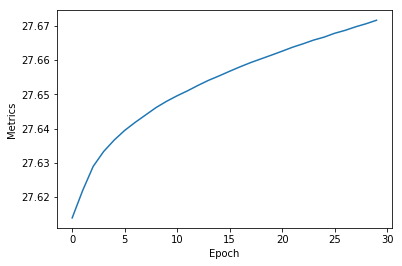

In [17]:
plt.plot(Trainer.history['mean_squared_error'])
plt.ylabel('Metrics')
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

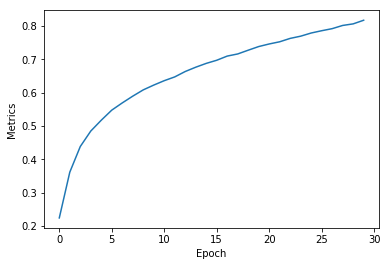

In [21]:
plt.plot(Trainer.history['acc'], scalex=True, scaley=True)
plt.ylabel('Metrics')
plt.xlabel("Epoch")

In [23]:
Trainer.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [0]:
m = Trainer.history['val_acc']
n = Trainer.history['acc']

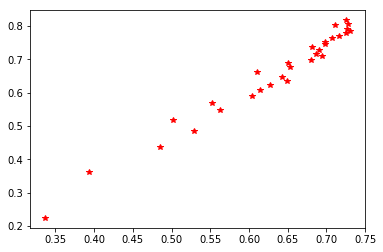

In [38]:
plt.plot(m,n, 'r*')